In [1]:
from data.get_data import main
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
acc_features = main()
accs = list(acc_features.keys())
features = list(acc_features.values())

arr = np.array(features)

X_amount = arr[:,:2]
X_freq = arr[:,2:4]

total_number_of_page:131 for 0x255aa6df07540cb5d3d297f0d0d4d84cb52bc8e6
1
len(all_arr): 50
1/50 0x00c7122633a4ef0bc72f7d02456ee2b11e97561e
2/50 0x3078f22015436d621062f7cc8334774eb5685e97
3/50 0x25bea2156246ca97a8352e1cbe4b19dd34bb307f
4/50 0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6
5/50 0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0
6/50 0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90
7/50 0x55b3230118d3952b35b7965b09752dd299a95706
8/50 0xc54d9a9fb8228057c8aee615ff40c09b5da93661
9/50 0xc42a717437e7dc0c17db770cad3a9fca62213d9e
10/50 0x000fc546070aeb43e6ada137f6aea9dde5c77f13
11/50 0x00ee4bb1c662180b3c76045e630e4d46a79709d3
12/50 0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8
13/50 0x762366f7ef88425cbeca9fbf72da951dda9b0f89
14/50 0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be
15/50 0x1f8978b550c0291627d5604a84e76fc044c23fb5
16/50 0x8d12a197cb00d4747a1fe03395095ce2a5cc6819
17/50 0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4
18/50 0x531ce1e3d2c0c835078d8246371c3259f5bb65c8
19/50 0xc8f387eb8edac64efae018dfd100

In [3]:
def plot_at_n(X,n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    for index in range(len(X)):
        print("{} {} {}".format(accs[index],cluster_labels[index],X[index],))
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

0x3078f22015436d621062f7cc8334774eb5685e97 0 [ 21342.69142569  -5458.52609431]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [  1.36365351e+04   1.88916010e+00]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 1 [ 199359.0203939    51010.00747392]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 1 [  2.07302646e+05   1.08843667e+00]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 5000. -4500.]
0x55b3230118d3952b35b7965b09752dd299a95706 0 [  2.41522303e+04   5.06286010e-01]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [  2.21810000e+03   1.00000000e-01]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 937.87910705  936.87910705]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [  2.22333647e+03   1.01719606e-01]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 0 [  2.00000000e+03   1.00000000e-02]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 0 [ 3551.  3551.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [  3.81110275e+03   8.80753110e-01]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 0 [  3.11815570e+04   5.57033860e

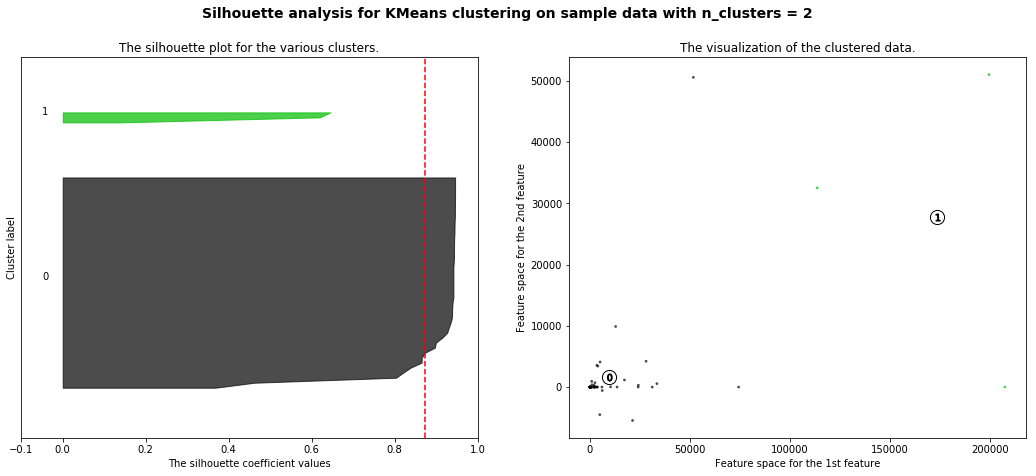

In [4]:
plot_at_n(X_amount,2)

0x3078f22015436d621062f7cc8334774eb5685e97 0 [ 21342.69142569  -5458.52609431    130.           -128.        ]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [  1.36365351e+04   1.88916010e+00   7.00000000e+01   3.70000000e+01]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 1 [  1.99359020e+05   5.10100075e+04   2.50000000e+01  -2.00000000e+00]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 1 [  2.07302646e+05   1.08843667e+00   9.10000000e+01  -1.56000000e+02]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 5000. -4500.    10.     5.]
0x55b3230118d3952b35b7965b09752dd299a95706 0 [  2.41522303e+04   5.06286010e-01   3.00000000e+01  -5.00000000e+00]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [  2.21810000e+03   1.00000000e-01   2.00000000e+00   1.00000000e+00]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 937.87910705  936.87910705    2.            1.        ]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [  2.22333647e+03   1.01719606e-01   1.00000000e+01   2.00000000e+00]
0x00ee4bb1c662180b3c7

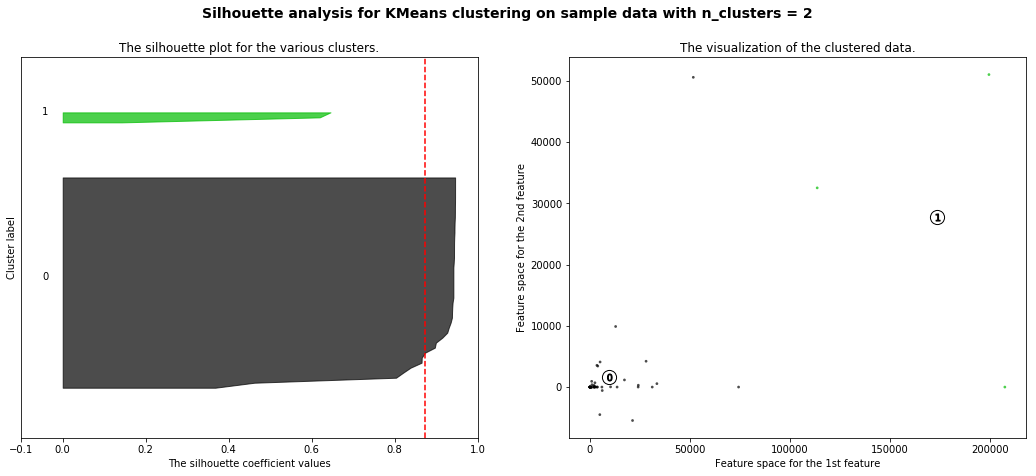

In [5]:
plot_at_n(arr,2)

0x3078f22015436d621062f7cc8334774eb5685e97 3 [ 21342.69142569  -5458.52609431]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [  1.36365351e+04   1.88916010e+00]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 1 [ 199359.0203939    51010.00747392]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 1 [  2.07302646e+05   1.08843667e+00]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 5000. -4500.]
0x55b3230118d3952b35b7965b09752dd299a95706 3 [  2.41522303e+04   5.06286010e-01]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [  2.21810000e+03   1.00000000e-01]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 937.87910705  936.87910705]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [  2.22333647e+03   1.01719606e-01]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 0 [  2.00000000e+03   1.00000000e-02]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 0 [ 3551.  3551.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [  3.81110275e+03   8.80753110e-01]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 3 [  3.11815570e+04   5.57033860e

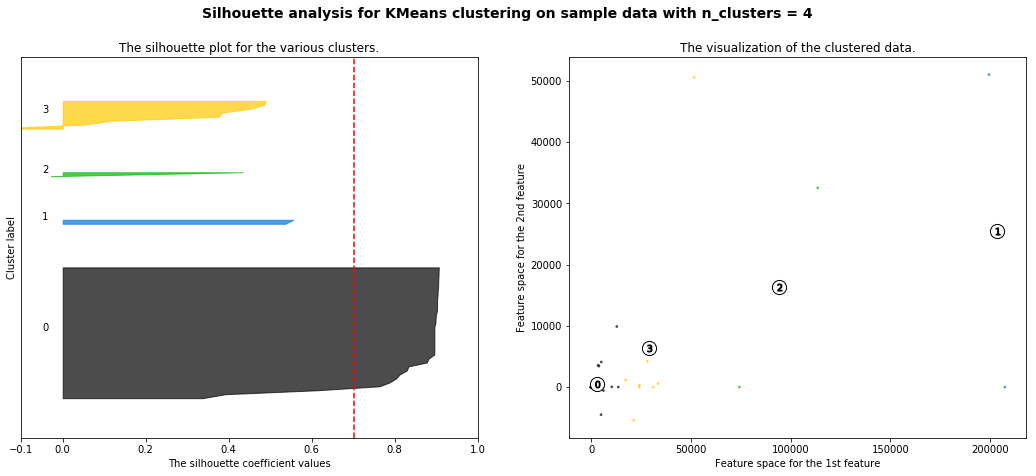

In [6]:
plot_at_n(X_amount,4)

0x3078f22015436d621062f7cc8334774eb5685e97 0 [ 130. -128.]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [ 70.  37.]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 0 [ 25.  -2.]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 0 [  91. -156.]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 10.   5.]
0x55b3230118d3952b35b7965b09752dd299a95706 0 [ 30.  -5.]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [ 2.  1.]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 2.  1.]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [ 10.   2.]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 0 [ 1.  0.]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 0 [ 7.  6.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [ 107.   13.]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 0 [ 4.  2.]
0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4 1 [ 226. -761.]
0x531ce1e3d2c0c835078d8246371c3259f5bb65c8 0 [ 100.  -58.]
0xc8f387eb8edac64efae018dfd10036bdbc059369 0 [ 85. -82.]
0x8a8fdba88f6bc02ae351371e63cb9ae614735535 0 [ 1.  0.]
0x96f0aa4251eb879290d36ae975c57a5

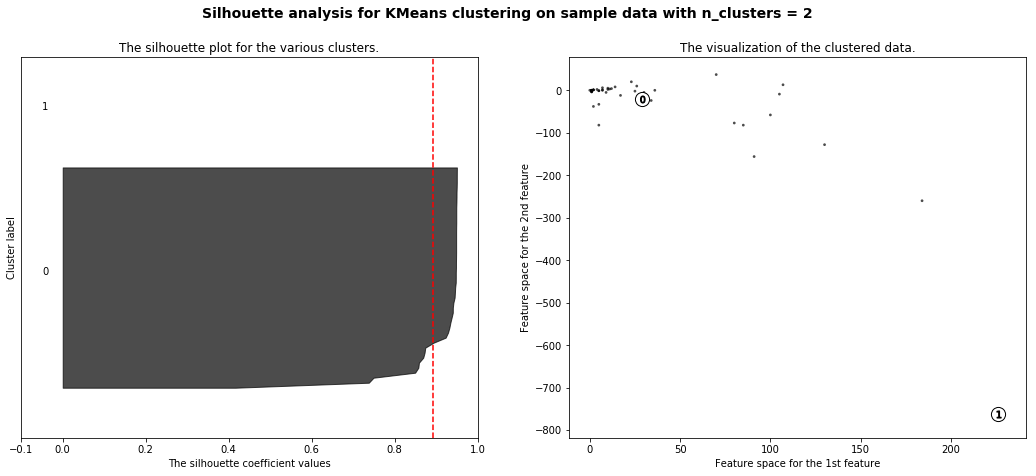

In [7]:
plot_at_n(X_freq,2)

0x3078f22015436d621062f7cc8334774eb5685e97 2 [ 130. -128.]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [ 70.  37.]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 0 [ 25.  -2.]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 2 [  91. -156.]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 10.   5.]
0x55b3230118d3952b35b7965b09752dd299a95706 0 [ 30.  -5.]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [ 2.  1.]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 2.  1.]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [ 10.   2.]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 0 [ 1.  0.]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 0 [ 7.  6.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [ 107.   13.]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 0 [ 4.  2.]
0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4 1 [ 226. -761.]
0x531ce1e3d2c0c835078d8246371c3259f5bb65c8 2 [ 100.  -58.]
0xc8f387eb8edac64efae018dfd10036bdbc059369 2 [ 85. -82.]
0x8a8fdba88f6bc02ae351371e63cb9ae614735535 0 [ 1.  0.]
0x96f0aa4251eb879290d36ae975c57a5

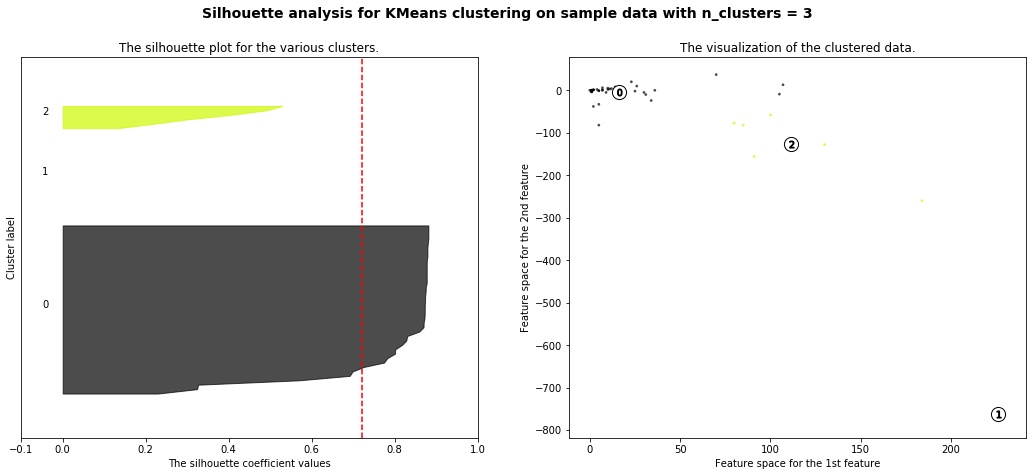

In [8]:
plot_at_n(X_freq,3)

0x3078f22015436d621062f7cc8334774eb5685e97 2 [ 130. -128.]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [ 70.  37.]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 0 [ 25.  -2.]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 2 [  91. -156.]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 0 [ 10.   5.]
0x55b3230118d3952b35b7965b09752dd299a95706 0 [ 30.  -5.]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 0 [ 2.  1.]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 0 [ 2.  1.]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 0 [ 10.   2.]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 0 [ 1.  0.]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 0 [ 7.  6.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 3 [ 107.   13.]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 0 [ 4.  2.]
0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4 1 [ 226. -761.]
0x531ce1e3d2c0c835078d8246371c3259f5bb65c8 3 [ 100.  -58.]
0xc8f387eb8edac64efae018dfd10036bdbc059369 3 [ 85. -82.]
0x8a8fdba88f6bc02ae351371e63cb9ae614735535 0 [ 1.  0.]
0x96f0aa4251eb879290d36ae975c57a5

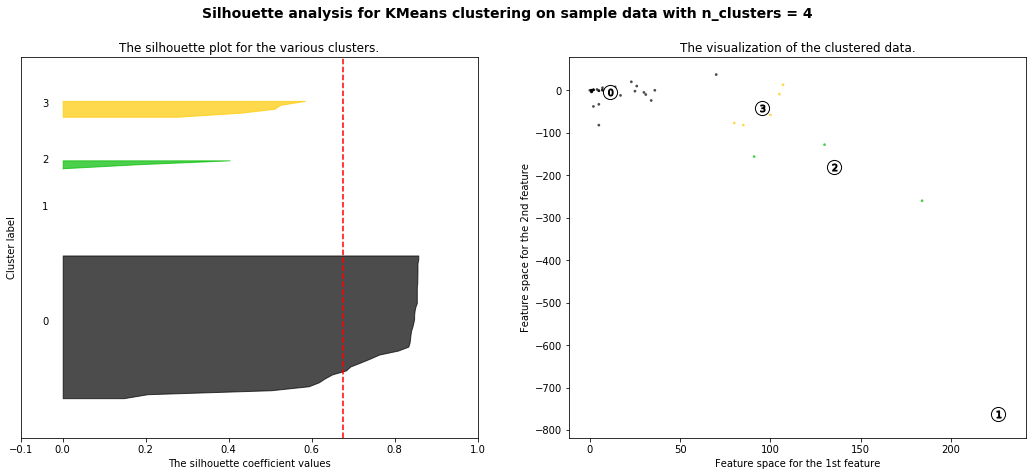

In [9]:
plot_at_n(X_freq,4)

0x3078f22015436d621062f7cc8334774eb5685e97 3 [ 130. -128.]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [ 70.  37.]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 2 [ 25.  -2.]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 3 [  91. -156.]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 2 [ 10.   5.]
0x55b3230118d3952b35b7965b09752dd299a95706 2 [ 30.  -5.]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 2 [ 2.  1.]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 2 [ 2.  1.]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 2 [ 10.   2.]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 2 [ 1.  0.]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 2 [ 7.  6.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [ 107.   13.]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 2 [ 4.  2.]
0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4 1 [ 226. -761.]
0x531ce1e3d2c0c835078d8246371c3259f5bb65c8 3 [ 100.  -58.]
0xc8f387eb8edac64efae018dfd10036bdbc059369 3 [ 85. -82.]
0x8a8fdba88f6bc02ae351371e63cb9ae614735535 2 [ 1.  0.]
0x96f0aa4251eb879290d36ae975c57a5

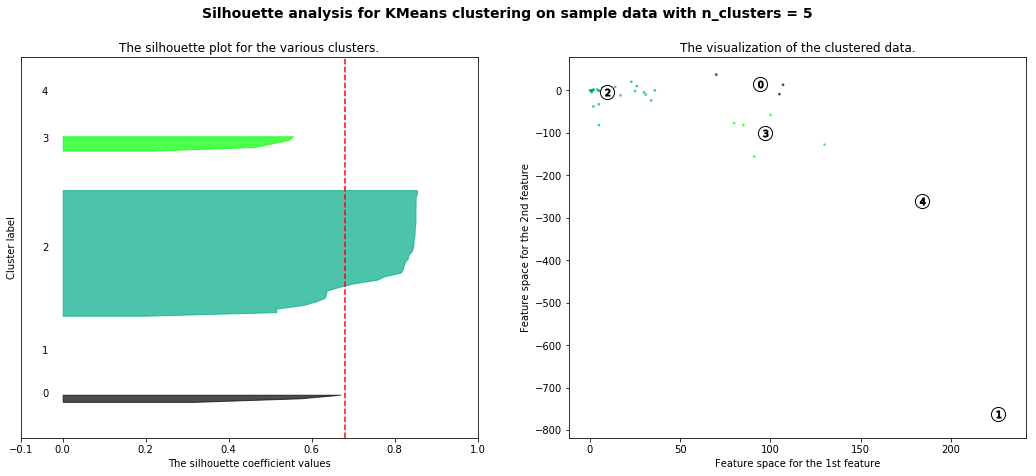

In [10]:
plot_at_n(X_freq,5)

0x3078f22015436d621062f7cc8334774eb5685e97 3 [ 130. -128.]
0x25bea2156246ca97a8352e1cbe4b19dd34bb307f 0 [ 70.  37.]
0xf51df14e49da86abc6f1d8ccc0b3a6b7b7c90ca6 2 [ 25.  -2.]
0x32c5c3b5d2eb4a60ba0e3eacc69a51d8356fc7e0 3 [  91. -156.]
0xce52a8dd7c8ad08e94b44620622e3630f7c1fc90 2 [ 10.   5.]
0x55b3230118d3952b35b7965b09752dd299a95706 2 [ 30.  -5.]
0xc54d9a9fb8228057c8aee615ff40c09b5da93661 2 [ 2.  1.]
0xc42a717437e7dc0c17db770cad3a9fca62213d9e 2 [ 2.  1.]
0x000fc546070aeb43e6ada137f6aea9dde5c77f13 2 [ 10.   2.]
0x00ee4bb1c662180b3c76045e630e4d46a79709d3 2 [ 1.  0.]
0xc5ded4584e9785cf7ae1eea7d1eb8872a136c2b8 2 [ 7.  6.]
0x762366f7ef88425cbeca9fbf72da951dda9b0f89 0 [ 107.   13.]
0x1f8978b550c0291627d5604a84e76fc044c23fb5 2 [ 4.  2.]
0xbc1845a864aa2a7ba7513bc6837ff7d66ec191c4 1 [ 226. -761.]
0x531ce1e3d2c0c835078d8246371c3259f5bb65c8 5 [ 100.  -58.]
0xc8f387eb8edac64efae018dfd10036bdbc059369 5 [ 85. -82.]
0x8a8fdba88f6bc02ae351371e63cb9ae614735535 2 [ 1.  0.]
0x96f0aa4251eb879290d36ae975c57a5

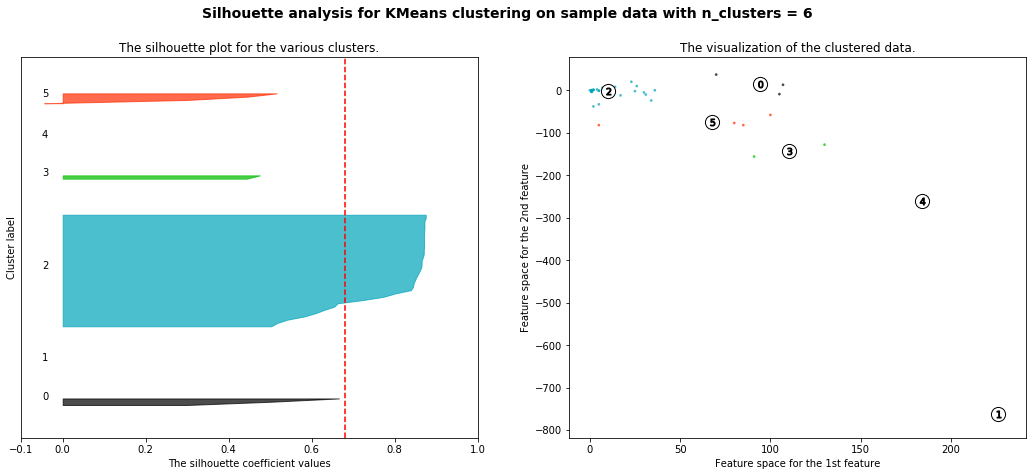

In [11]:
plot_at_n(X_freq,6)